# Intro to web scraping

Web scraping is the general term used for techniques involving the automation of gathering data from a website. In this notebook, we will learn how to do web scraping tasks, like downloading data or images off the internet. To web scrape with Python, we first need to learn how websites work.

When a browser loads a website, what the user sees is called the "front-end" of the website. Let's have an overview on how websites connect to the internet and how the browser displays informaion to you. Let's say you wanted to read a wikipeda article. To do this, you open your computer, connect to the internet, open up your browser, and then your browser gets some information from wikipedia and displays it in a format that is readable by humans. What Wikipedia is actually doing, however, is returning code to the browser in HTML. This is special code that your browser can display and understand. 


What we will be doing here is being able to read this code that wikipedia is sending back to us, and we will use a Python web-scraping program to grab what we want directly. 

There are 3 main things we need to understand to learn web scraping:


1. the rules of web scraping

2. the limitations of web scraping

3. basic HTML and CSS (CSS is another language used by websites)

### Rules of web scraping

You should always try and get permission before scraping! If you do too many scraping attempts or requests, your IP adress could get blocked from that website. Some sites automatically block web scraping software. Before scraping a website, you should check the rules or guidelines page of that site to see if scraping is allowed. 

### Limitations of web scraping

In general, every website is unique, meaning that each web scraping script will be unique. A slight change or an update to a website might completely break your web scraping script.

### Basic HTML and CSS

These programming languages (along with JavaScript) are the 3 main components of the front end of a website. These are the 3 things that are passed into your web browser to give it display information. Python is basically going to grab the raw documents or raw code itself and extract information from it. When viewing a website, the browser does not show you all that source code behind the website, only the HTML and some CSS and JS that the website sends to your browser. 


HTML is used to make the basic structure and content of a webpage.CSS is used for the design and style of the page, where elements are placed, and overall how it looks. For basic effective web scraping we only need a basic understanding of HTML and CSS. Python can view these elements programatically, and then extract info from the website. JavaScript is used to define the interactive parts of a webpage. HTML is Hypertext Markup Language and is on every website on the internet. You can right-click on a website and select "view page source" to get an example of this. Here's a very basic example of some HTML code:

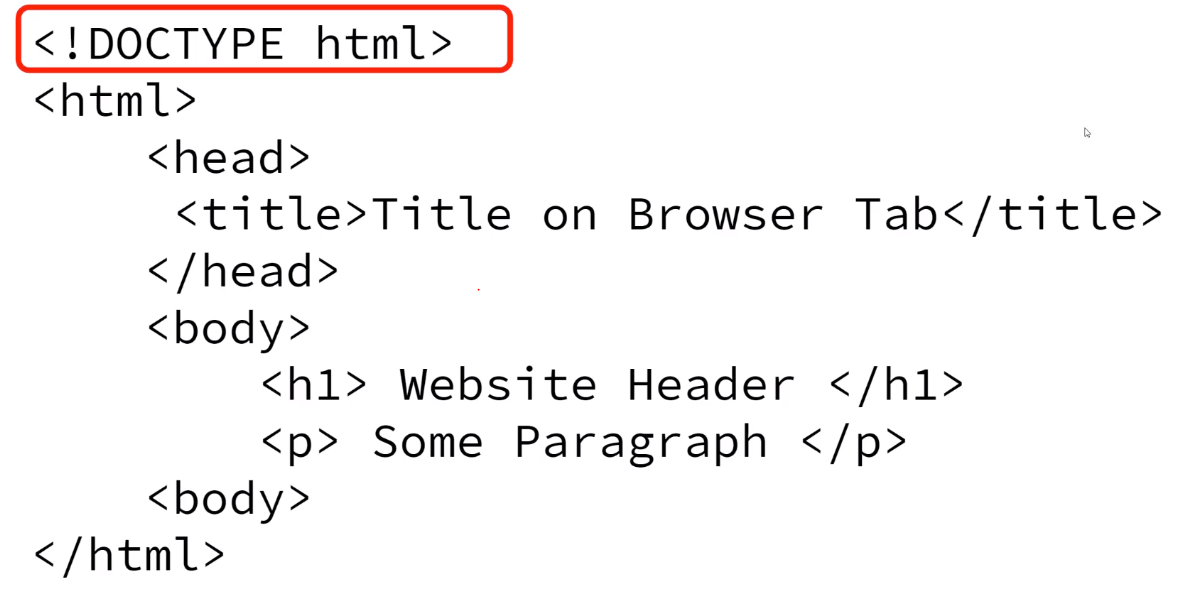

The first line at the top tells whoever is reading the file that this is an HTML file - the document type is html. 

Next, we have these various 'tags', or elements. Some examples of these tags are the html tags, the head tags and the body tags. There is a tag but later in the code there is a closing tag, which is the same as teh opening but has a forwards slash before the actual words in the tag.

Next, we have the Head portion of the html code. This carries some high-level information, such as what the title of the web page is. 

Then, we have the Body portion. This has the main code of the website, with headers and some paragraphs. 

The main thing to understand here is that there are these tags that we can search for in the web scraping process. 

CSS stands for Cascading Style Sheets, and gives style to a website, by doing thins such as changing colors or fonts. CSS uses tags to define what HTML elements will be styled. Here's some example HTML code with some CSS:

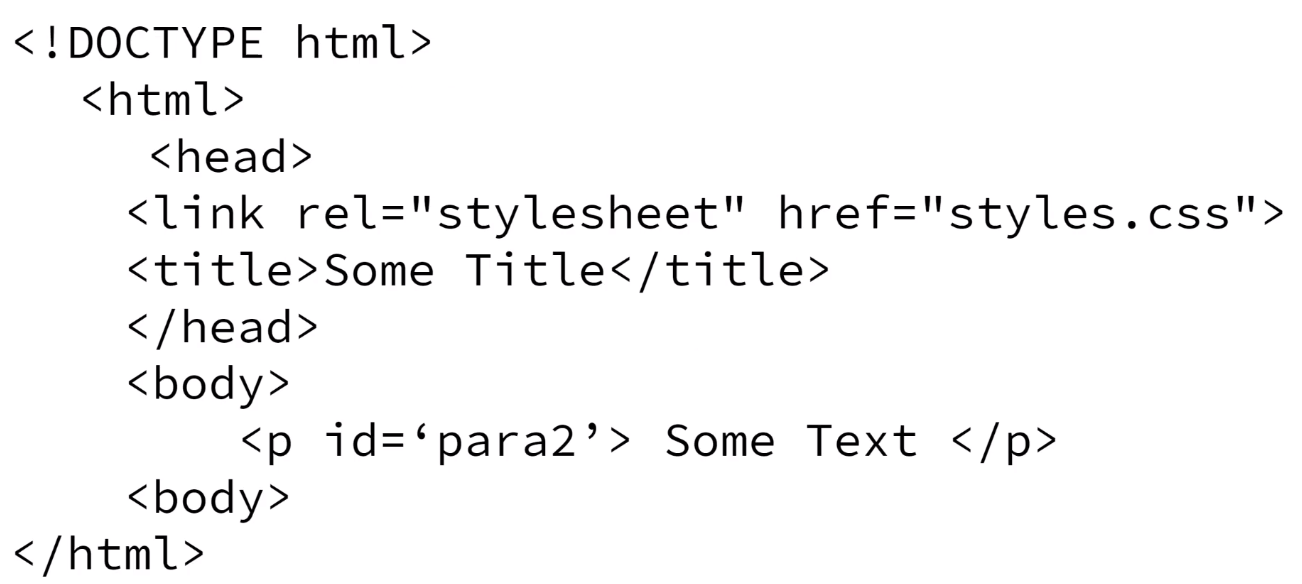

In this head section we have actually linked some CSS code to the HTML code using the link tag, and we say that the relationship is going to be a 'stylesheet', essentially telling us that this is a CSS file, and the href is a reference to the actuall CSS file, telling the HTML document where to find the CSS file. The way CSS works is that once you link to a CSS file, you have access to things such as IDs and Classes. Notice here that, inside this paragraph tag, there is code that says "id = 'para2'". Para2 is an id call inside the CSS code, an now this paragraph tag has a connection to ID equal to para2, it's going to grab its style choices from the para2 code in the css file. 


Now, what does the CSS code actually look like? This is an example of the the CSS style looks like:

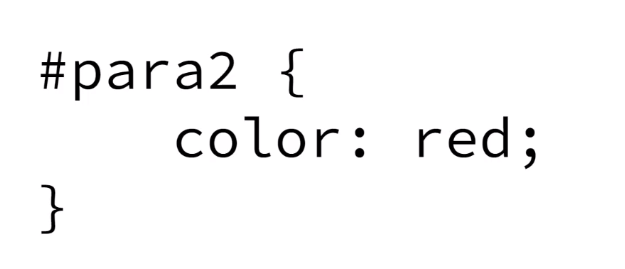

So how this code works is that there is this hashtag symbol, 'para2', and then a dictionary - looking thing where there are key value pairs separated by colons. It says color : red, which means anything tagged or linked to this para2 ID will be colored red when it is read by a browser.

Another way to access CSS in HTML code is using classes. Here's an example of some code with classes in it:

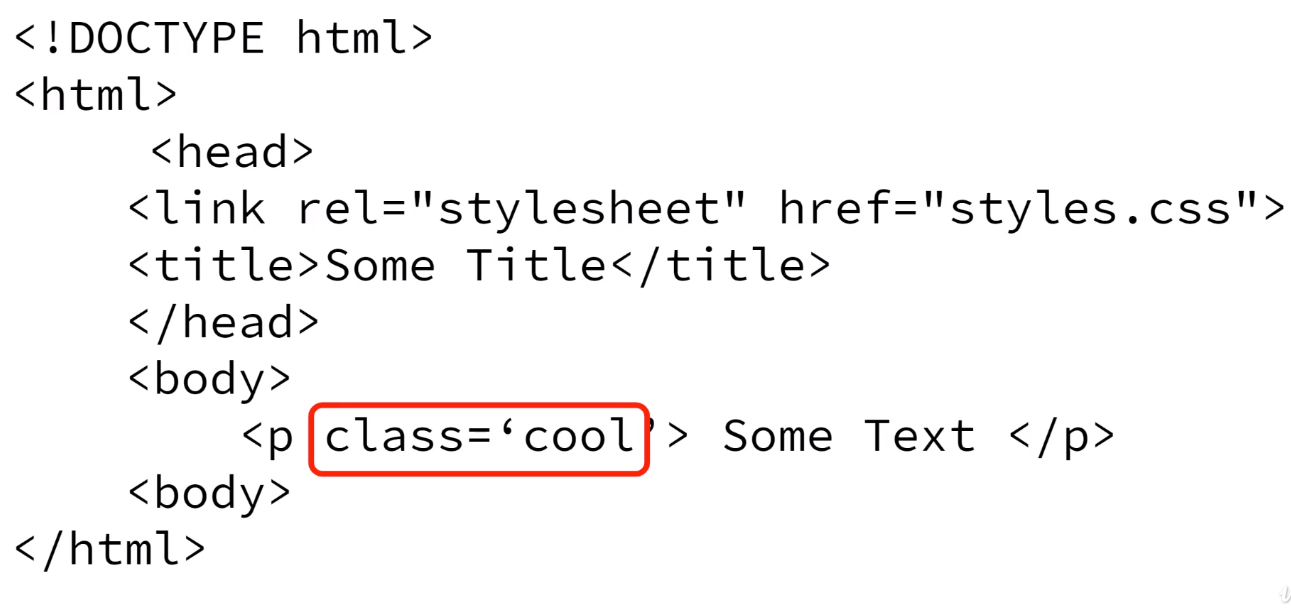

What class is doing here is it links to the css document where there is some code which explains 'cool':

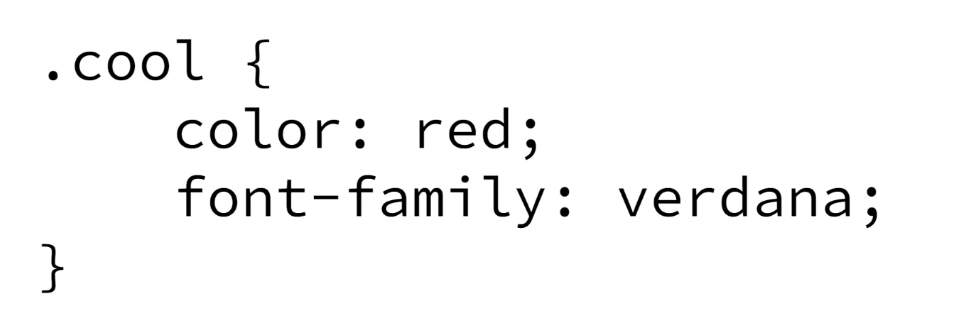

What this code shows is a period, then cool, then some of that same dictionary stuff. The period is there because classes are denoted by periods in CSS. Classes are used when you want to add the same style to multiple elements across different tags. ID's are only one-use in your entire code, but classes can be used multiple times.

In CSS, you can also do things that go across all of one type of tag, such as all paragraphs by putting just the letter for that tag in the wording before the curly braces that denote the dictionary thing. 

### Recap

This is a lot of information, but the main points to take away from here are that HTML contains the information, CSS contains the styling, and we can use HTML and CSS tags to locate specific info on a page. 

To web scrape with python, we can use the BeautifulSoup and request libraries. These are external libraries that are outside of python so you need to install them with either conda or pip at your command line. here's how to install:

pip install requests

pip install lxml

pip install bs4

For anaconda distributions, use conda install instead of pip install. 

# Setting up web scraping libraries

To set up web scraping, we will install the necessary libraries for web scraping, and learn how to inspect element and view source of a webpage. We have already done the first part earlier, so let's get into the inspect-elementing and the view-sourceing.


The first thing we are going to do is go to the wikipedia site for Jonas Salk. Here is the link: https://en.wikipedia.org/wiki/Jonas_Salk. Let's look at the source code that wikipedia is sending to the browser, which then shows it in a way readable to humans. To do this, we just right click on the page and select "View Page Source". We can then see this huge HTML document that has all the source code for the website. 

When we are web scraping, we aren't going to be opening this huge document and then trying to find something there. That is really hard given how much info we have to filter through. We can instead use Inspect for specific elements on the website. Let's say we want the image of Jonas Salk on his wikipedia page. We can right click on it then click "inspect" to open up the html code on the side, but already scrolled to that particular part of the code, with the part hightlighted. This is where the importance of learning CSS and HTML comes into play if you are going to do lots of web scraping. 

# Grabbing titles with web scraping

To grab titles from a webpage with web scraping, we first need to get our web scraping set up. The first thing we have to do is import requests:

In [2]:
import requests

Then, we need to grab a webpage using a request:

In [2]:
#NOTE: where example.com is right now, you could put
#a different website name if you were scraping
#something different.
result = requests.get("http://www.example.com")

In [3]:
type(result)

requests.models.Response

As we can see, the type of the result variable is a special type called a requests.models.Response. We can call result.text to see the HTML code of the website we grabbed:

In [4]:
result.text

'<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 2em;\n        background-color: #fdfdff;\n        border-radius: 0.5em;\n        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        div {\n            margin: 0 auto;\n            width: auto;\n        }\n    }\n    </style>    \n</head>\n\n<body>\n<div>\n    <

The .text version of this gives us a string we can work with in python. However, this is just text - to parse through the code, we need to use Beautiful Soup. It will let us grab and take information from this:

In [3]:
import bs4

In [6]:
soup = bs4.BeautifulSoup(result.text,"lxml")

The first parameter of our code above is the code we will parse through, and the second is the string of the engine that we will use to parse through the html text - we will be using lmxl for this. 

In [7]:
soup

<!DOCTYPE html>
<html>
<head>
<title>Example Domain</title>
<meta charset="utf-8"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 2em;
        background-color: #fdfdff;
        border-radius: 0.5em;
        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        div {
            margin: 0 auto;
            width: auto;
        }
    }
    </style>
</head>
<body>
<div>
<h1>Example Domain</h1>
<p>This domain is for use in illustrative examples

Now, in the Beautiful Soup output, we want to grab the line of code that says < title >Example Domain< /title >. To do this, we will use the .select method from beautiful soup:

In [9]:
soup.select('title')

[<title>Example Domain</title>]

The parameter in the function represents the name of the tag we are looking for. For the output, we get a list of all the title tags on the page. To grab the actual text, however, we can use the .getText() method which returns back the actual string:

In [10]:
soup.select('title')[0].getText()

'Example Domain'

# Grabbing classes with web scraping

In order to grab CSS classes with BeautifulSoup, we can use this table which explains the syntax for the scraping of classes in code:

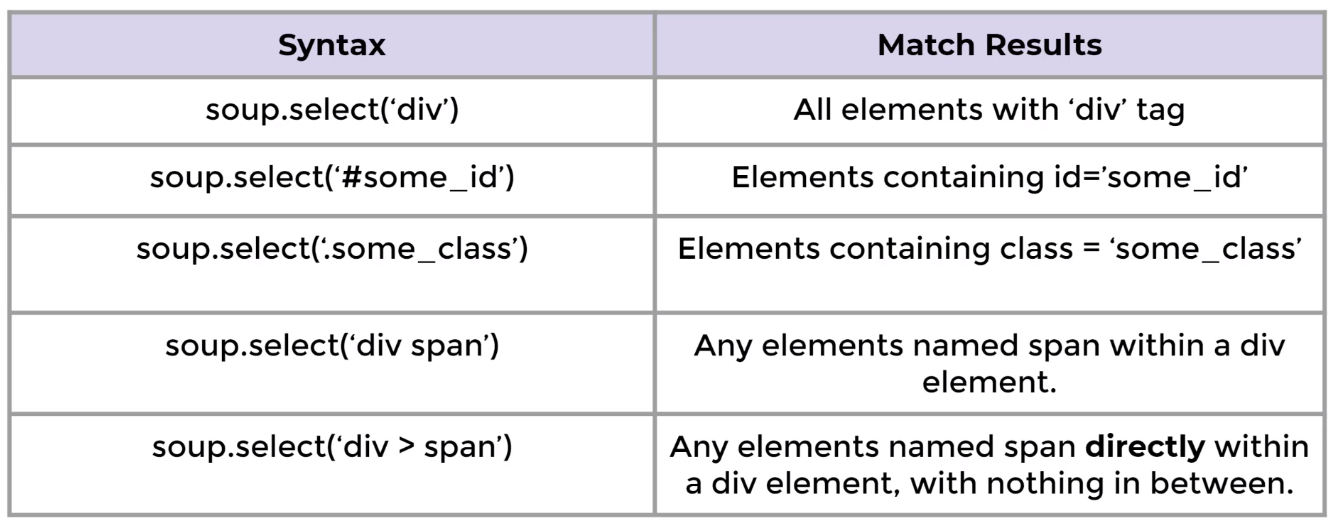

Now, let's say we are looking for elements within elements. To do this, we can use soup.select('div span'), where it grabs any element named span within the div element. The method soup.select('div > span') does a simliar thing, but it is just the elements named span direcly within div, with nothing in between. 


Let's practice getting classes from a Wikipedia article, specificially Grace Hopper's wikipedia article. Let's say we want to grab the table of contents. If we right click on one of the links in the table, we get that the table of contents uses a class called toctext - all the other table of contents thigns have this. We want to grab all the things with toctext in this document. Let's go on the jupyter notebook to do this:

In [3]:
res = requests.get('https://en.wikipedia.org/wiki/Grace_Hopper')

In [4]:
soup = bs4.BeautifulSoup(res.text,'lxml')

In [5]:
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Grace Hopper - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"4bc42af2-ebde-41f1-a658-ae4ba433c02a","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Grace_Hopper","wgTitle":"Grace Hopper","wgCurRevisionId":1023926937,"wgRevisionId":1023926937,"wgArticleId":12590,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All pages needing factual verification","Wikipedia articles needing factual verification from November 2013","X1","CS1 maint: discouraged parameter","Articles with short de

Now, let's grab the toctext class:

In [6]:
soup.select('.toctext')

[<span class="toctext">Early life and education</span>,
 <span class="toctext">Career</span>,
 <span class="toctext">World War II</span>,
 <span class="toctext">UNIVAC</span>,
 <span class="toctext">COBOL</span>,
 <span class="toctext">Standards</span>,
 <span class="toctext">Retirement</span>,
 <span class="toctext">Post-retirement</span>,
 <span class="toctext">Anecdotes</span>,
 <span class="toctext">Death</span>,
 <span class="toctext">Dates of rank</span>,
 <span class="toctext">Awards and honors</span>,
 <span class="toctext">Military awards</span>,
 <span class="toctext">Other awards</span>,
 <span class="toctext">Legacy</span>,
 <span class="toctext">Places</span>,
 <span class="toctext">Programs</span>,
 <span class="toctext">In popular culture</span>,
 <span class="toctext">Grace Hopper Celebration of Women in Computing</span>,
 <span class="toctext">See also</span>,
 <span class="toctext">Notes</span>,
 <span class="toctext">Obituary notices</span>,
 <span class="toctext">Re

As you can see, we have been able to grab all the things with the toctext class in them.

# Grabbing images with web scraping

Now that we know how to grab text info, let's see how to grab images with BeautifulSoup. Images typically have their own URL's, such as .jpeg or .png. We can use Beautiful Soup to scan a page, locate the < img > tags and grabe these URLs. Then, we need to download those URLs as images onto the computer and write them to the computer. It is important that you always check the copyright permissions before taking and using images from the internet. Let's use the Deep Blue wikipedia page to grab the images on it. 

In [4]:
res = requests.get("https://en.wikipedia.org/wiki/Deep_Blue_(chess_computer)")

In [5]:
soup = bs4.BeautifulSoup(res.text,'lxml')

In [6]:
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Deep Blue (chess computer) - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"8f4192cf-f827-454c-8ffa-36497878cc73","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Deep_Blue_(chess_computer)","wgTitle":"Deep Blue (chess computer)","wgCurRevisionId":1022192647,"wgRevisionId":1022192647,"wgArticleId":49387,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: postscript","CS1 maint: unfit URL","Webarchive template wayback links","Articles with short description","Short descrip

Now, let's grab with the img tag:

In [7]:
soup.select('img')

[<img alt="Deep Blue.jpg" data-file-height="601" data-file-width="400" decoding="async" height="331" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/be/Deep_Blue.jpg/220px-Deep_Blue.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/be/Deep_Blue.jpg/330px-Deep_Blue.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/b/be/Deep_Blue.jpg 2x" width="220"/>,
 <img alt="Chess Programming.svg" data-file-height="60" data-file-width="60" decoding="async" height="150" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/52/Chess_Programming.svg/150px-Chess_Programming.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/52/Chess_Programming.svg/225px-Chess_Programming.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/52/Chess_Programming.svg/300px-Chess_Programming.svg.png 2x" width="150"/>,
 <img alt="" class="thumbimage" data-file-height="600" data-file-width="800" decoding="async" height="165" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/6f/

However, there are many images and this might not be the image we want. We need to only have images which are within the article, not just all the images on the whole page. We see that all the images in the article itself have the class 'thumbimage'. Let's see if we can select everything with teh thumbimage: 

In [9]:
soup.select('.thumbimage')

[<img alt="" class="thumbimage" data-file-height="600" data-file-width="800" decoding="async" height="165" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Kasparov_Magath_1985_Hamburg-2.png/220px-Kasparov_Magath_1985_Hamburg-2.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Kasparov_Magath_1985_Hamburg-2.png/330px-Kasparov_Magath_1985_Hamburg-2.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Kasparov_Magath_1985_Hamburg-2.png/440px-Kasparov_Magath_1985_Hamburg-2.png 2x" width="220"/>]

Now, let's see if we can download this image:

In [10]:
pic1 = soup.select('.thumbimage')[0]

In [11]:
pic1

<img alt="" class="thumbimage" data-file-height="600" data-file-width="800" decoding="async" height="165" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Kasparov_Magath_1985_Hamburg-2.png/220px-Kasparov_Magath_1985_Hamburg-2.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Kasparov_Magath_1985_Hamburg-2.png/330px-Kasparov_Magath_1985_Hamburg-2.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Kasparov_Magath_1985_Hamburg-2.png/440px-Kasparov_Magath_1985_Hamburg-2.png 2x" width="220"/>

We just want the URL of the image past the words 'src='. With this special bs4 tag object, we can treat it as a dictionary and call specific parts of it:

In [12]:
pic1['class']

['thumbimage']

In [13]:
pic1['src']

'//upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Kasparov_Magath_1985_Hamburg-2.png/220px-Kasparov_Magath_1985_Hamburg-2.png'

We get the url back for use. To download it in jupyter, we just turn the image into an image by turning a cell into a markdown and using the < img > tags that are part of jupyter markdowns to do this. Inside the img call, we put the words src = 'www.example.com'.

<img src = '//upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Kasparov_Magath_1985_Hamburg-2.png/220px-Kasparov_Magath_1985_Hamburg-2.png'>

Here is the image we got. Now, let's say we want to make a request on this image? We can do this like any other request:

In [14]:
image_link = requests.get('https://upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Kasparov_Magath_1985_Hamburg-2.png/220px-Kasparov_Magath_1985_Hamburg-2.png')

Now we can use the .content method to grab the raw content of the image itself:

In [15]:
image_link.content

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xdc\x00\x00\x00\xa5\x08\x06\x00\x00\x007w\x93\x88\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00 cHRM\x00\x00z&\x00\x00\x80\x84\x00\x00\xfa\x00\x00\x00\x80\xe8\x00\x00u0\x00\x00\xea`\x00\x00:\x98\x00\x00\x17p\x9c\xbaQ<\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x00\x80\x00IDATx\xdal\xfd\xe7\xb3^Y\x96\xde\x89\xfd\xb69\xe6\xb5\xd7;\xe0\xc2#\x91\x99@\x9a\xca\xac,\xef\xbb\xba\x8b5\xddl\xb2\xc9\x16\x193t31!\x86\xa8\x08)\xa4?@1\x7f\x80\xbe\xe8\x9b\x141!Q\n*Dr4\x1c\xcdpDR\xed\xaa\xbb\xba\xaa\xbb\xcbge\xa5\xa9\xf4@\xc2^\xe0\xda\xd7\x1d\xbb\x9d>\xecs/\xb29\x83\x00\xe2\x02/\xdc1{\xaf\xbd\xd6\xb3\x9e\xe7Y\xe2\xb7\xbf\xf6\xcc\xa4\xa8\xb4\xb2\xb5Rk\x9b^^\xbc\xaa\x94m\x8c\x9c\x1c*y\xfb\xa1\xe3\x83\x07\x02\xebZ^\xbc\x01\x977S\xa6\x93\xc0\xfd\x03\xc1\xdd\xfd\x86T\x0b\xbe\xf5\xea\x18)\xe6\xcc\'\x02\xe7\x15E\x15\xa8L\

This is the binary file of the image itself, which the computer can read. Python is smart enough to be able to write, read, and save this file to your computer. Here's how we do this:

In [16]:
#What we are doing here is writing to a jpeg file in the first parameter,
#And setting the mode to wb, which means write binary.

f = open('my_image.jpg','wb')

In [17]:
f.write(image_link.content)

85054

What we have just done in the above cell is written to our file the binary content of the file. 

In [19]:
f.close()

Now, you can open the file on your computer and see that it has been added there.

# Web scraping example 1

We know how to grab element one at a time, but in reality we will be trying to grab many different elements, likely from many different pages. We can use prior Python knowledge with web scraping libraries to make powerful scripts! We will use a website made for practicing web scraping, called toscrape.com, and practice grabbing elements across multiple pages. Let's practice with the books website, at books.toscrape.com. We will try and get the title of every book with a two star rating. First, let's import our libraries:

In [1]:
import requests

In [2]:
import bs4

The first problem that we encounter is that we are ownly shown 20 results out of 1000 at a time. We will need to find a way, with python, to keep looping and going through all the pages. We need to figure out what the procedure is that is happening when we go from one page to another. We can see that the page is in this format: 'http://books.toscrape.com/catalogue/page-2.html' where 2 can be replaced with any page number from 1 to 50 and work. A way to go through all the pages would be to just put in the string url and insert in a number where 2 is to go through the pages. Let's set this up:

In [3]:
base_url = 'http://books.toscrape.com/catalogue/page-{}.html'

Now, we can use the .format method to insert a number in:

In [4]:
base_url.format('5')

'http://books.toscrape.com/catalogue/page-5.html'

In [5]:
base_url.format('7')

'http://books.toscrape.com/catalogue/page-7.html'

Now, we need to figure out how to scrape through every page in the catalogue using a loop. Once we do that, we need to find what class is related with a star review, find all the 2 star items, and add the titles of those 2 star books to a list. The easiest way to find the star rating class is to inspect the stars. By doing this, we get that there are classes for each rating: there is a class called 'star-rating One', 'star-rating Two', and so on. However, we aren't just looking for the star rating, we are looking for the associated book name. We can see that all the stuff, including the star rating and the title, is contained in product class known as 'product_pod'. We see that what we will be doing is grabbing the product pod of every book on the page, then filtering through each one to see if it has the star-rating Two class. Let's start by grabbing all the product_pod class instances on the first page:

In [6]:
res = requests.get(base_url.format('1'))

In [7]:
soup = bs4.BeautifulSoup(res.text,'lxml')

In [8]:
soup

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]--><!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]--><!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:30" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="../static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="../static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="

Now, let's get all the things with teh product_pod class!

In [9]:
soup.select('.product_pod')

[<article class="product_pod">
 <div class="image_container">
 <a href="a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">Â£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="thumbnail" src="../media/cach

In [10]:
len(soup.select('.product_pod'))

20

We see that there are 20 items in teh product pod, which makes sense because there are 20 books on the first page. Now, let's go through our product_pod list of of items and see if we can grab with a star rating of 2. The quick and dirty way to do this is to convert our items in the list into strings, then iterate through the strings to see if star rating of 2 is in the item. The way to do this with Beautiful Soup is to see if the 2 star rating class is there inside each item is by taking the items in the list and using soup.select() on them:

In [11]:
products = soup.select('.product_pod')

In [12]:
example = products[0]

In [13]:
example

<article class="product_pod">
<div class="image_container">
<a href="a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">Â£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [14]:
example.select('.star-rating Three')

[]

Note that this doesn't work because of the space that is there. We need to fill that space in with a dot:

In [15]:
example.select('.star-rating.Three')

[<p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>]

Now, we have the ability to see if the item is two stars or not. Now, we need to see how we can grab the title of the book itself. We see that, in the example, in the tag a, there is a title call. Let's look for all instances of this a tag:

In [16]:
example.select('a')

[<a href="a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>,
 <a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a>]

We see that the first appearance is for the image link, and the second appearance is for the text link. The text link holds the title, so that is the one we care about. Because this is a bs4 tag item, we can grab parts from it like a dictionary:

In [17]:
example.select('a')[1]['title']

'A Light in the Attic'

Here, we get the title. Now, what we will do is loop through all the pages using the insert thing. Let's set this loop up:

In [18]:
#list of 2 star titles
two_star_titles = []

In [19]:
for n in range(1,51):
    
    #makes it so that the url changes over iterations
    scrape_url = base_url.format(n)
    res = requests.get(scrape_url)
    
    #makes a soup of the stuff
    soup = bs4.BeautifulSoup(res.text,'lxml')
    #finds all the products on the page
    books = soup.select('.product_pod')
    
    #loop through books
    for book in books:
        #check if a book is 2 stars
        if len(book.select('.star-rating.Two')) != 0:
            two_star_titles.append(book.select('a')[1]['title'])

In [20]:
two_star_titles

['Starving Hearts (Triangular Trade Trilogy, #1)',
 'Libertarianism for Beginners',
 "It's Only the Himalayas",
 'How Music Works',
 'Maude (1883-1993):She Grew Up with the country',
 "You can't bury them all: Poems",
 'Reasons to Stay Alive',
 'Without Borders (Wanderlove #1)',
 'Soul Reader',
 'Security',
 'Saga, Volume 5 (Saga (Collected Editions) #5)',
 'Reskilling America: Learning to Labor in the Twenty-First Century',
 'Political Suicide: Missteps, Peccadilloes, Bad Calls, Backroom Hijinx, Sordid Pasts, Rotten Breaks, and Just Plain Dumb Mistakes in the Annals of American Politics',
 'Obsidian (Lux #1)',
 'My Paris Kitchen: Recipes and Stories',
 'Masks and Shadows',
 'Lumberjanes, Vol. 2: Friendship to the Max (Lumberjanes #5-8)',
 'Lumberjanes Vol. 3: A Terrible Plan (Lumberjanes #9-12)',
 'Judo: Seven Steps to Black Belt (an Introductory Guide for Beginners)',
 'I Hate Fairyland, Vol. 1: Madly Ever After (I Hate Fairyland (Compilations) #1-5)',
 'Giant Days, Vol. 2 (Giant Day

# Web Scraping Exercises

Done in course docs

In [1]:
import requests
import bs4

In [2]:
res = requests.get('https://en.wikipedia.org/wiki/Liu_Cixin')

In [3]:
soup = bs4.BeautifulSoup(res.text,'lxml')

In [4]:
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Liu Cixin - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"7fc351de-489e-4f3c-9590-f0e226e33b81","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Liu_Cixin","wgTitle":"Liu Cixin","wgCurRevisionId":1025444192,"wgRevisionId":1025444192,"wgArticleId":30091140,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","CS1 French-language sources (fr)","CS1 German-language sources (de)","Articles with short description","Short description matches Wikidata","U

In [5]:
soup.select('img')

[<img alt="Liu in 2015" data-file-height="2500" data-file-width="2000" decoding="async" height="275" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/2a/Geek_Bar_Tor_authors_event_-_Cixin_Liu_%2818397919319%29.jpg/220px-Geek_Bar_Tor_authors_event_-_Cixin_Liu_%2818397919319%29.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/2a/Geek_Bar_Tor_authors_event_-_Cixin_Liu_%2818397919319%29.jpg/330px-Geek_Bar_Tor_authors_event_-_Cixin_Liu_%2818397919319%29.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/2a/Geek_Bar_Tor_authors_event_-_Cixin_Liu_%2818397919319%29.jpg/440px-Geek_Bar_Tor_authors_event_-_Cixin_Liu_%2818397919319%29.jpg 2x" width="220"/>,
 <img alt="" class="noviewer" data-file-height="355" data-file-width="300" decoding="async" height="40" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Wikiquote-logo.svg/34px-Wikiquote-logo.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Wikiquote-logo.svg/51px-Wikiquote-logo.svg.png 1.5x

In [6]:
image = soup.select('img')[0]

In [7]:
image

<img alt="Liu in 2015" data-file-height="2500" data-file-width="2000" decoding="async" height="275" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/2a/Geek_Bar_Tor_authors_event_-_Cixin_Liu_%2818397919319%29.jpg/220px-Geek_Bar_Tor_authors_event_-_Cixin_Liu_%2818397919319%29.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/2a/Geek_Bar_Tor_authors_event_-_Cixin_Liu_%2818397919319%29.jpg/330px-Geek_Bar_Tor_authors_event_-_Cixin_Liu_%2818397919319%29.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/2a/Geek_Bar_Tor_authors_event_-_Cixin_Liu_%2818397919319%29.jpg/440px-Geek_Bar_Tor_authors_event_-_Cixin_Liu_%2818397919319%29.jpg 2x" width="220"/>

In [9]:
image['src']

'//upload.wikimedia.org/wikipedia/commons/thumb/2/2a/Geek_Bar_Tor_authors_event_-_Cixin_Liu_%2818397919319%29.jpg/220px-Geek_Bar_Tor_authors_event_-_Cixin_Liu_%2818397919319%29.jpg'

In [10]:
import requests
import bs4

In [20]:
auth_names = []

for i in range(1,11):
    url = f'http://quotes.toscrape.com/page/{i}/'
    
    res = requests.get(url)
    
    soup = bs4.BeautifulSoup(res.text,'lxml')
    
    auth_tags = soup.select('.author')
    
    for j in auth_tags:
        auth_names += j.contents

In [21]:
auth_names

['Albert Einstein',
 'J.K. Rowling',
 'Albert Einstein',
 'Jane Austen',
 'Marilyn Monroe',
 'Albert Einstein',
 'André Gide',
 'Thomas A. Edison',
 'Eleanor Roosevelt',
 'Steve Martin',
 'Marilyn Monroe',
 'J.K. Rowling',
 'Albert Einstein',
 'Bob Marley',
 'Dr. Seuss',
 'Douglas Adams',
 'Elie Wiesel',
 'Friedrich Nietzsche',
 'Mark Twain',
 'Allen Saunders',
 'Pablo Neruda',
 'Ralph Waldo Emerson',
 'Mother Teresa',
 'Garrison Keillor',
 'Jim Henson',
 'Dr. Seuss',
 'Albert Einstein',
 'J.K. Rowling',
 'Albert Einstein',
 'Bob Marley',
 'Dr. Seuss',
 'J.K. Rowling',
 'Bob Marley',
 'Mother Teresa',
 'J.K. Rowling',
 'Charles M. Schulz',
 'William Nicholson',
 'Albert Einstein',
 'Jorge Luis Borges',
 'George Eliot',
 'George R.R. Martin',
 'C.S. Lewis',
 'Marilyn Monroe',
 'Marilyn Monroe',
 'Albert Einstein',
 'Marilyn Monroe',
 'Marilyn Monroe',
 'Martin Luther King Jr.',
 'J.K. Rowling',
 'James Baldwin',
 'Jane Austen',
 'Eleanor Roosevelt',
 'Marilyn Monroe',
 'Albert Einstein'

In [22]:
auth_dict = {}

for k in auth_names:
    if k not in auth_dict.keys():
        auth_dict[k] = 1
    else:
        auth_dict[k] += 1

In [23]:
print(auth_dict)

{'Albert Einstein': 10, 'J.K. Rowling': 9, 'Jane Austen': 5, 'Marilyn Monroe': 7, 'André Gide': 1, 'Thomas A. Edison': 1, 'Eleanor Roosevelt': 2, 'Steve Martin': 1, 'Bob Marley': 3, 'Dr. Seuss': 6, 'Douglas Adams': 1, 'Elie Wiesel': 1, 'Friedrich Nietzsche': 1, 'Mark Twain': 6, 'Allen Saunders': 1, 'Pablo Neruda': 1, 'Ralph Waldo Emerson': 2, 'Mother Teresa': 2, 'Garrison Keillor': 1, 'Jim Henson': 1, 'Charles M. Schulz': 1, 'William Nicholson': 1, 'Jorge Luis Borges': 1, 'George Eliot': 1, 'George R.R. Martin': 2, 'C.S. Lewis': 5, 'Martin Luther King Jr.': 1, 'James Baldwin': 1, 'Haruki Murakami': 1, 'Alexandre Dumas fils': 1, 'Stephenie Meyer': 1, 'Ernest Hemingway': 2, 'Helen Keller': 1, 'George Bernard Shaw': 1, 'Charles Bukowski': 2, 'Suzanne Collins': 2, 'J.R.R. Tolkien': 1, 'Alfred Tennyson': 1, 'Terry Pratchett': 1, 'J.D. Salinger': 1, 'George Carlin': 1, 'John Lennon': 1, 'W.C. Fields': 1, 'Ayn Rand': 1, 'Jimi Hendrix': 1, 'J.M. Barrie': 1, 'E.E. Cummings': 1, 'Khaled Hosseini

In [24]:
curr_highest = ['',0]
for current_author in auth_dict.keys():
    if auth_dict[current_author] > curr_highest[1]:
        curr_highest[0] = current_author
        curr_highest[1] = auth_dict[current_author]

In [27]:
curr_highest

['Albert Einstein', 10]